# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", context="talk")

# Reading Data

In [2]:
train = pd.read_csv(r"D:\Data Science\Projects\Analytics vidya\loan Eligibility Prediction\train.csv")
test = pd.read_csv(r"D:\Data Science\Projects\Analytics vidya\loan Eligibility Prediction\test.csv")
sample_sub = pd.read_csv(r"D:\Data Science\Projects\Analytics vidya\loan Eligibility Prediction\sample_submission_49d68Cx.csv")

In [3]:
print('Shape of train: {}'.format(train.shape))
print('Shape of test: {}'.format(test.shape))

Shape of train: (614, 13)
Shape of test: (367, 12)


---
# Data Dictionary

Loan_ID : 	Unique Loan ID

Gender : 	Male/ Female

Married : 	Applicant married (Y/N)

Dependents : 	Number of dependents

Education : 	Applicant Education (Graduate/ Under Graduate)

Self_Employed : 	Self employed (Y/N)

ApplicantIncome : 	Applicant income

CoapplicantIncome : 	Coapplicant income

LoanAmount : 	Loan amount in thousands

Loan_Amount_Term : 	Term of loan in months

Credit_History : 	credit history meets guidelines

Property_Area : 	Urban/ Semi Urban/ Rural

Loan_Status : 	(Target) Loan approved (Y/N)

---
### Merging Train and Test Data

In [4]:
train['is_train'] = 1
test['is_train'] = 0
test['Loan_Status'] = None

data = pd.concat((train,test))
data.set_index('Loan_ID', inplace = True)

---
# Exploratory Data Analysis

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,981.0,5179.795107,5695.104533,0.0,2875.0,3800.0,5516.0,81000.0
CoapplicantIncome,981.0,1601.916330,2718.772806,0.0,0.0,1110.0,2365.0,41667.0
LoanAmount,954.0,142.511530,77.421743,9.0,100.0,126.0,162.0,700.0
Loan_Amount_Term,961.0,342.201873,65.100602,6.0,360.0,360.0,360.0,480.0
Credit_History,902.0,0.835920,0.370553,0.0,1.0,1.0,1.0,1.0
is_train,981.0,0.625892,0.484139,0.0,0.0,1.0,1.0,1.0


# Missing Value Analysis

In [6]:
data.isna().sum()/data.shape[0]*100

Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
is_train              0.000000
dtype: float64

### 1. Gender

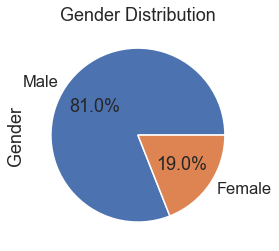

In [7]:
plt.title('Gender Distribution')
data['Gender'].value_counts().plot.pie(autopct = '%1.1f%%')

## There are total 81% Males in data. For Imputation We will try to find where we have more Female distribution

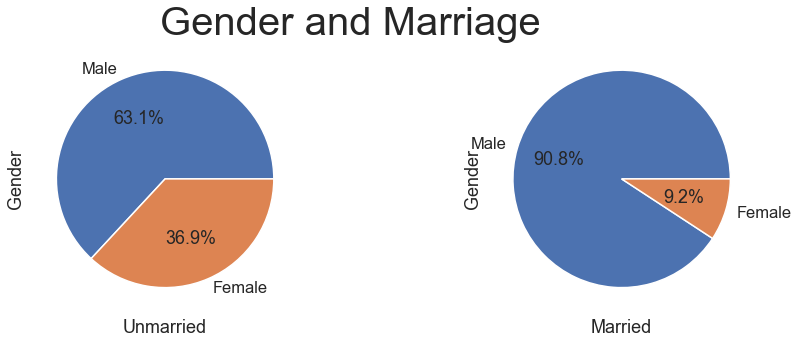

In [8]:
f,ax = plt.subplots(nrows=1,ncols=2, figsize = (15,5))
axx = ax.flatten()
plt.title('Gender and Marriage',fontsize=40,x=-0.5,y=1)

ax[0].set_xlabel('Unmarried')
ax[1].set_xlabel('Married')

data[ data['Married'] == 'No']['Gender'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axx[0])
data[ data['Married'] == 'Yes']['Gender'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axx[1])

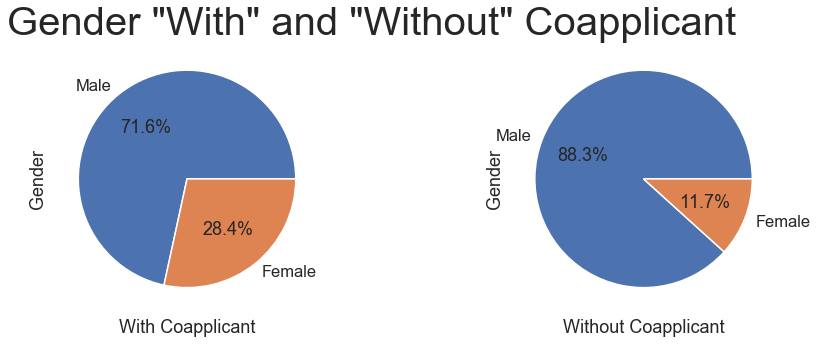

In [9]:
f,ax = plt.subplots(nrows=1,ncols=2, figsize = (15,5))
axx = ax.flatten()
plt.title('Gender "With" and "Without" Coapplicant',fontsize=40,x=-0.5,y=1)

ax[0].set_xlabel('With Coapplicant')
ax[1].set_xlabel('Without Coapplicant')
data[ data['CoapplicantIncome'] == 0]['Gender'].value_counts().plot.pie(autopct='%1.1f%%', ax = axx[0])
data[ data['CoapplicantIncome'] !=0]['Gender'].value_counts().plot.pie(autopct='%1.1f%%', ax = axx[1])

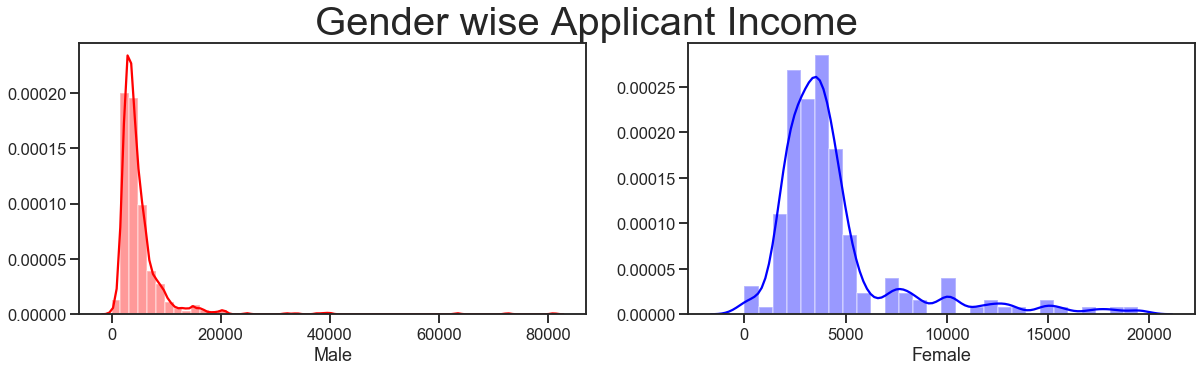

In [10]:
f,ax = plt.subplots(nrows=1,ncols=2, figsize = (20,5))
axx = ax.flatten()

plt.title('Gender wise Applicant Income',fontsize=40,x=-0.2,y=1)

sns.distplot(data[(data['Gender'] == 'Male')]['ApplicantIncome'] ,ax = axx[0], axlabel='Male', color='Red')
sns.distplot(data[(data['Gender'] == 'Female')]['ApplicantIncome'] ,ax = axx[1], axlabel='Female', color='Blue')

## Insights For Imputation

`Basic Info` : 'Gender' column have 81% males and 19% females.

1. There are no `Females` who have Income greater than 20000.
2. There are total 37% females with Marriage_Status as 'No'.
3. Females are applying for loan 'WITH' Coapplicant more than Males.

So we will fill the missing values of  'Gender' with these insights.

In [11]:
data.loc[(data['Gender'].isna()) & (data['ApplicantIncome'] > 20000), 'Gender'] = 'Male'

In [12]:
data.loc[(data['Gender'].isna()) & (data['Married'] == 'No'), 'Gender'] = 'Female'

In [13]:
data.loc[ (data['Gender'].isna()) & (data['CoapplicantIncome'] == 0), 'Gender'] = 'Male'

In [14]:
data['Gender'].fillna('Male', inplace=True)

---
### 2. Married

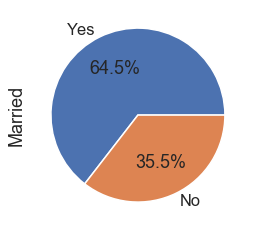

In [15]:
data['Married'].value_counts().plot.pie(autopct = '%1.1f%%')

In [16]:
data.loc[ (data['Married'].isna())]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,is_train
Loan_ID,,,,,,,,,,,,,
LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y,1
LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y,1
LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y,1


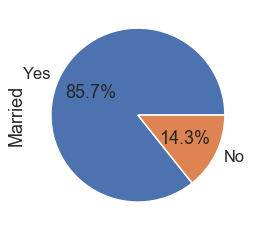

In [17]:
data[ (data['Gender'] == 'Male') & (data['Education'] == 'Graduate') & (data['Self_Employed'] == 'No') & (data['LoanAmount'].between(157,163))]['Married'].value_counts().plot.pie(autopct = '%1.1f%%')

In [18]:
data[ (data['Gender'] == 'Female') & (data['Education'] == 'Graduate') & (data['ApplicantIncome'].between(9000,11000))]['Married'].value_counts()

No     4
Yes    1
Name: Married, dtype: int64

In [19]:
data.loc[(data['Married'].isna()) & (data['Gender'] == 'Male'), 'Married'] = 'Yes'

In [20]:
data['Married'].fillna('No', inplace = True)

---
### 3. Dependernts

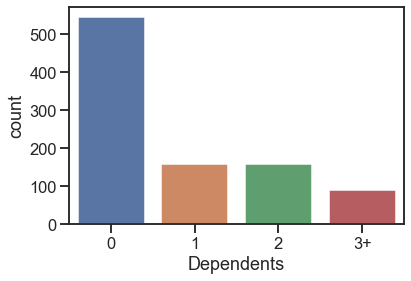

In [21]:
sns.countplot(data['Dependents'])

In [22]:
data.groupby('Married')['Dependents'].value_counts()

Married  Dependents
No       0             276
         1              36
         2              14
         3+             12
Yes      0             269
         2             146
         1             124
         3+             79
Name: Dependents, dtype: int64

[Text(0.5, 0, 'Married')]

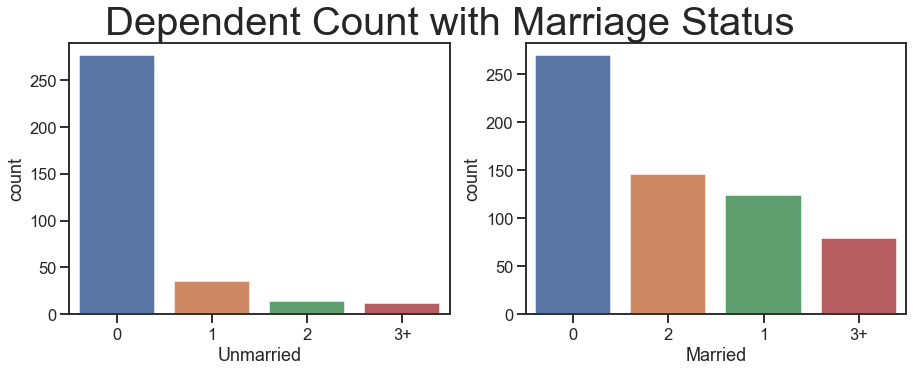

In [23]:
f,ax = plt.subplots(nrows=1,ncols=2, figsize = (15,5))
axx = ax.flatten()
plt.title('Dependent Count with Marriage Status',fontsize=40,x=-0.2,y=1)

sns.countplot(data[ data['Married'] == 'No']['Dependents'],ax = axx[0])
sns.countplot(data[ data['Married'] == 'Yes']['Dependents'], ax = axx[1],order = data[ data['Married'] == 'Yes']['Dependents'].value_counts().index)

ax[0].set(xlabel = 'Unmarried')
ax[1].set(xlabel = 'Married')

In [24]:
data.loc[ (data['Dependents'].isna()) & (data['Married'] == 'No'), 'Dependents'] = '0'

In [25]:
data[ (data['Self_Employed'] == 'Yes') & (data['Married'] == "Yes")]['Dependents'].value_counts()

0     28
2     20
1     19
3+    10
Name: Dependents, dtype: int64

In [26]:
data[ (data['Gender'] == 'Male') & (data['Married'] == 'Yes') & (data['Self_Employed'] == 'No') & (data['Education'] == 'Not Graduate')]['Dependents'].value_counts()

0     40
2     34
3+    18
1     17
Name: Dependents, dtype: int64

#### Imputing Missing Values of Dependents Using Above Analysis.

In [27]:
data.loc[ (data['Dependents'].isna()) & (data['Married'] == 'No'), 'Dependents'] = '0'
data.loc[ (data['Dependents'].isna()) & (data['Self_Employed'] == 'Yes') & (data['Married'] == "Yes"), 'Dependents'] = '2'
data.loc[ (data['Dependents'].isna()) & (data['Gender'] == 'Male') & (data['Married'] == 'Yes') & (data['Self_Employed'] == 'No') & (data['Education'] == 'Not Graduate'), 'Dependents'] = '2'
data['Dependents'].fillna('0', inplace = True)

---
### 4. Self_Employed

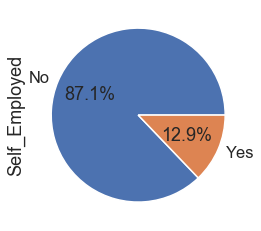

In [28]:
data['Self_Employed'].value_counts().plot.pie(autopct = '%1.1f%%')

In [29]:
data[ data['Self_Employed'].isna()]#['Dependents'].value_counts()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,is_train
Loan_ID,,,,,,,,,,,,,
LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y,1
LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y,1
LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N,1
LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y,1
LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N,1
LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N,1
LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N,1
LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y,1
LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y,1


In [30]:
data[ data['Self_Employed'] == 'Yes']['Dependents'].value_counts()

0     60
1     25
2     23
3+    11
Name: Dependents, dtype: int64

In [31]:
data[ data['Self_Employed'] == 'No']['Dependents'].value_counts()

0     478
2     133
1     121
3+     75
Name: Dependents, dtype: int64

1. Imputing 'Self_Employed' as 'Yes' for those who have dependents greater than 0. 
2. Imputing all remaining missing values as 'No'.

In [32]:
data.loc[ (data['Self_Employed'].isna()) & (data['Dependents'] != '0'), 'Self_Employed'] = 'Yes'
data['Self_Employed'].fillna('No', inplace= True)

---
### 5. LoanAmount

Text(0.5, 0, 'Distribution Before Imputation')

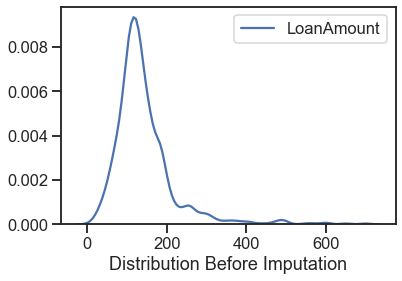

In [33]:
sns.kdeplot(data['LoanAmount'])
plt.xlabel('Distribution Before Imputation')

#### <font color = 'Red'> Filling Missing Values 'LoanAmount' on basis of : 'ApplicantsIncome (range)', 'CoapplicantsIncome', 'Property_Area'

In [34]:
data.loc[ (data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(1800,5000)) & (data['CoapplicantIncome']==0) & (data['Property_Area'] == 'Urban'), 'LoanAmount'] = data[ (~data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(1800,5000)) & (data['CoapplicantIncome']==0) & (data['Property_Area'] == 'Urban')]['LoanAmount'].median()
data.loc[ (data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(5000,7000)) & (data['CoapplicantIncome']==0) & (data['Property_Area'] == 'Urban'), 'LoanAmount'] = data[ (~data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(5000,7000)) & (data['CoapplicantIncome']==0) & (data['Property_Area'] == 'Urban')]['LoanAmount'].median()
data.loc[ (data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(9999,15000)) & (data['CoapplicantIncome']==0) & (data['Property_Area'] == 'Urban'), 'LoanAmount'] = data[ (~data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(9999,15000)) & (data['CoapplicantIncome']==0) & (data['Property_Area'] == 'Urban')]['LoanAmount'].median()
data.loc[ (data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(2000,5000)) & (data['CoapplicantIncome']>0) & (data['Property_Area'] == 'Urban'),'LoanAmount'] = data[ (~data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(2000,5000)) & (data['CoapplicantIncome']>0) & (data['Property_Area'] == 'Urban')]['LoanAmount'].median()
data.loc[ (data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(8000,10000)) & (data['CoapplicantIncome']>0) & (data['Property_Area'] == 'Urban'),'LoanAmount'] = data[ (~data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(8000,10000)) & (data['CoapplicantIncome']>0) & (data['Property_Area'] == 'Urban')]['LoanAmount'].median()
data.loc[ (data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(3000,4800)) & (data['CoapplicantIncome']>0) & (data['Property_Area'] == 'Semiurban'), 'LoanAmount'] = data[ (~data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(3000,4800)) & (data['CoapplicantIncome']>0) & (data['Property_Area'] == 'Semiurban')]['LoanAmount'].median()
data.loc[ (data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(2000,2500)) & (data['CoapplicantIncome']==0) & (data['Property_Area'] == 'Semiurban'), 'LoanAmount'] = data[ (~data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(2000,2500)) & (data['CoapplicantIncome']==0) & (data['Property_Area'] == 'Semiurban')]['LoanAmount'].median()
data.loc[ (data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(7000,11000)) & (data['CoapplicantIncome']==0) & (data['Property_Area'] == 'Semiurban'), 'LoanAmount'] = data[ (~data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(7000,11000)) & (data['CoapplicantIncome']==0) & (data['Property_Area'] == 'Semiurban')]['LoanAmount'].median()
data.loc[ (data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(2000,4000)) & (data['CoapplicantIncome']>0) & (data['Property_Area'] == 'Rural'), 'LoanAmount'] = data[ (~data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(2000,4000)) & (data['CoapplicantIncome']>0) & (data['Property_Area'] == 'Rural')]['LoanAmount'].median()
data.loc[ (data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(4500,7000)) & (data['CoapplicantIncome']==0) & (data['Property_Area'] == 'Rural'), 'LoanAmount'] = data[ (~data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(4500,6500)) & (data['CoapplicantIncome']==0) & (data['Property_Area'] == 'Rural')]['LoanAmount'].median()
data.loc[ (data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(9000,13500)) & (data['CoapplicantIncome']==0) & (data['Property_Area'] == 'Rural'), 'LoanAmount'] = data[ (~data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(9000,13500)) & (data['CoapplicantIncome']==0) & (data['Property_Area'] == 'Rural')]['LoanAmount'].median()
data.loc[ (data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(17000,23000)) & (data['CoapplicantIncome']==0) & (data['Property_Area'] == 'Rural'), 'LoanAmount'] = data[ (~data['LoanAmount'].isna())  & (data['ApplicantIncome'].between(17000,23000)) & (data['CoapplicantIncome']==0) & (data['Property_Area'] == 'Rural')]['LoanAmount'].median()


Text(0.5, 0, 'Distribution After Imputation')

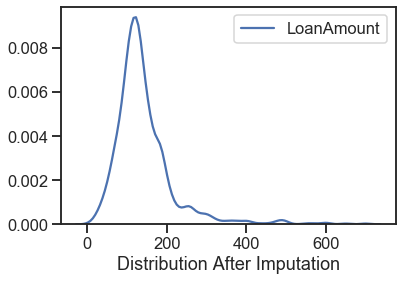

In [35]:
sns.kdeplot(data['LoanAmount'])
plt.xlabel('Distribution After Imputation')

---
### 7. Loan_Amount_Term

In [36]:
data.isna().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
is_train               0
dtype: int64

In [37]:
data['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [38]:
data['Loan_Amount_Term'].replace( {6.0:60.0, 12.0 : 60.0, 36:60, 84.0 : 60,120.0:180.0, 240.0:300.0, 350.0 : 360.0}, inplace = True)

In [39]:
data[data['Loan_Amount_Term'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,is_train
Loan_ID,,,,,,,,,,,,,
LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y,1
LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N,1
LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y,1
LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y,1
LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N,1
LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N,1
LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y,1
LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y,1
LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y,1


In [40]:
data.groupby('Loan_Amount_Term')['LoanAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Amount_Term,,,,,,,,
60.0,16.0,130.375000,43.544422,80.0,104.75,121.5,146.75,260.0
180.0,70.0,124.900000,93.752550,17.0,73.50,114.0,148.00,600.0
300.0,28.0,158.357143,129.001066,50.0,85.50,129.5,176.25,700.0
360.0,824.0,144.548544,72.817809,9.0,104.00,130.0,165.25,600.0
480.0,23.0,134.260870,117.022227,63.0,89.00,112.0,142.50,650.0


#### Imputing by Mode

In [41]:
data['Loan_Amount_Term'].fillna(360.0, inplace=True)

In [54]:
data.isna().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History        77
Property_Area          0
Loan_Status          367
is_train               0
dtype: int64

---
### 8. Credit History

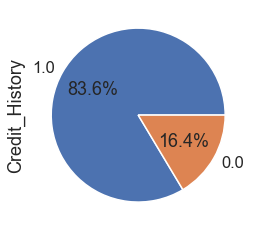

In [43]:
data['Credit_History'].value_counts().plot.pie(autopct = '%1.1f%%')

In [44]:
data[data['Credit_History'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,is_train
Loan_ID,,,,,,,,,,,,,
LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,300.0,NaN,Urban,Y,1
LP001052,Male,Yes,1,Graduate,Yes,3717,2925.0,151.0,360.0,NaN,Semiurban,N,1
LP001091,Male,Yes,1,Graduate,Yes,4166,3369.0,201.0,360.0,NaN,Urban,N,1
LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y,1
LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002853,Female,No,0,Not Graduate,No,3015,2000.0,145.0,360.0,NaN,Urban,None,0
LP002901,Male,No,0,Graduate,No,2283,15000.0,106.0,360.0,NaN,Rural,None,0
LP002954,Male,Yes,2,Not Graduate,No,3132,0.0,76.0,360.0,NaN,Rural,None,0


In [55]:
data['Credit_History'].fillna(1, inplace = True)

In [58]:
data.to_csv(r"D:\Data Science\Projects\Analytics vidya\loan Eligibility Prediction\preprocessed.csv", index=False)